In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_attached = "attached_apex.csv"
file_detached = "detached_apex.csv"
townhomes_data = pd.read_csv(file_attached)
homes_data = pd.read_csv(file_detached)

In [2]:
townhomes_data.count()

MLS #                    1538
Status                   1538
Address                  1538
City                     1538
Zip                      1538
Closing Date             1538
Subdivision              1538
LvngAreaSF               1538
YrBlt                    1538
Beds                     1538
FBths                    1538
HBths                    1538
Property Type            1538
List Price               1538
Sold Price               1538
Days On Market           1538
HOA Y/N                  1326
Garage                   1538
Acres                    1538
Sold Price/List Price    1538
dtype: int64

In [3]:
homes_data.count()

MLS #                    5114
Status                   5114
Address                  5114
City                     5114
Zip                      5114
Closing Date             5114
Subdivision              5114
LvngAreaSF               5114
YrBlt                    5114
Beds                     5114
FBths                    5114
HBths                    5114
Property Type            5114
List Price               5114
Sold Price               5114
Days On Market           5114
HOA Y/N                  4571
Garage                   5114
Acres                    5114
Sold Price/List Price    5114
dtype: int64

In [4]:
townhomes_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,List Price,Sold Price,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,"1,058",2007,2,2,1,Attached,"$169,000.00","$163,000.00",2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,"1,275",1988,2,2,1,Attached,"$164,900.00","$164,900.00",0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,"1,062",2007,2,1,1,Attached,"$170,900.00","$165,000.00",21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,"1,056",2007,2,2,1,Attached,"$172,900.00","$166,000.00",36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,"1,056",2007,2,1,1,Attached,"$169,900.00","$169,900.00",2,Yes,0,0-.25 Acres,1.00


In [5]:
homes_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,List Price,Sold Price,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2307699,CLOSED,472 NC 751 Highway,Apex,27523,9/28/2020,Not in a Subdivision,"1,480",1989,2,2,0,Detached,"$150,000.00",$1.00,111,NaN,0,1-2.9 Acres,0.00
1,2198042,CLOSED,5520 Bobbitt Road,Apex,27539,8/29/2018,Not in a Subdivision,640,1962,2,0,0,Detached,"$59,000.00","$59,000.00",62,NaN,0,0-.25 Acres,1.00
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,"1,083",1953,2,1,0,Detached,"$75,000.00","$92,000.00",2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,"1,344",1997,3,2,0,Detached,"$84,500.00","$100,000.00",16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,"$109,500.00","$105,000.00",49,NaN,0,1-2.9 Acres,0.96


In [6]:
townhomes_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                object
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
List Price                object
Sold Price                object
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [7]:
townhomes_df = townhomes_data.copy()
townhomes_df = townhomes_df.rename(columns={"Sold Price": "SoldPrice"})
townhomes_df = townhomes_df.rename(columns={"List Price": "ListPrice"})

#remove $
townhomes_df['SoldPrice'] = townhomes_df.SoldPrice.str.lstrip('$')
townhomes_df['ListPrice'] = townhomes_df.ListPrice.str.lstrip('$')
#remove comma
townhomes_df['SoldPrice'] = townhomes_df['SoldPrice'].str.replace(',', '').astype(float)
townhomes_df['ListPrice'] = townhomes_df['ListPrice'].str.replace(',', '').astype(float)
townhomes_df['LvngAreaSF'] = townhomes_df['LvngAreaSF'].str.replace(',', '').astype(int)
townhomes_df.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,1058,2007,2,2,1,Attached,169000.0,163000.0,2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,1275,1988,2,2,1,Attached,164900.0,164900.0,0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,1062,2007,2,1,1,Attached,170900.0,165000.0,21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,1056,2007,2,2,1,Attached,172900.0,166000.0,36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,1056,2007,2,1,1,Attached,169900.0,169900.0,2,Yes,0,0-.25 Acres,1.00


In [8]:
homes_df = homes_data.copy()
homes_df = homes_df.rename(columns={"Sold Price": "SoldPrice"})
homes_df = homes_df.rename(columns={"List Price": "ListPrice"})

#remove $
homes_df['SoldPrice'] = homes_df.SoldPrice.str.lstrip('$')
homes_df['ListPrice'] = homes_df.ListPrice.str.lstrip('$')
#remove comma
homes_df['SoldPrice'] = homes_df['SoldPrice'].str.replace(',', '').astype(float)
homes_df['ListPrice'] = homes_df['ListPrice'].str.replace(',', '').astype(float)
homes_df['LvngAreaSF'] = homes_df['LvngAreaSF'].str.replace(',', '').astype(int)
homes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2307699,CLOSED,472 NC 751 Highway,Apex,27523,9/28/2020,Not in a Subdivision,1480,1989,2,2,0,Detached,150000.0,1.0,111,NaN,0,1-2.9 Acres,0.00
1,2198042,CLOSED,5520 Bobbitt Road,Apex,27539,8/29/2018,Not in a Subdivision,640,1962,2,0,0,Detached,59000.0,59000.0,62,NaN,0,0-.25 Acres,1.00
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,1083,1953,2,1,0,Detached,75000.0,92000.0,2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,1344,1997,3,2,0,Detached,84500.0,100000.0,16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,109500.0,105000.0,49,NaN,0,1-2.9 Acres,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2284447,CLOSED,809 Journeys Rest Lane,Apex,27523,9/10/2020,Destin,3911,2019,3,3,1,Detached,1495000.0,1450000.0,0,Yes,3,.26-.5 Acres,0.97
5110,2344559,CLOSED,478 Democracy Place,Apex,27502,12/16/2019,Heritage Pointe,5816,2019,5,4,1,Detached,1557238.0,1557238.0,0,Yes,3,3-5.9 Acres,1.00
5111,2303170,CLOSED,117 Lexington Drive,Apex,27523,2/20/2020,Lexington,6055,2020,5,6,1,Detached,1531349.0,1615756.0,0,NaN,4,3-5.9 Acres,1.06
5112,2303517,CLOSED,261 Lexington Drive,Apex,27523,2/22/2020,Lexington,5150,2019,4,4,2,Detached,1675109.0,1675109.0,0,NaN,4,1-2.9 Acres,1.00


In [9]:
homes_df["Subdivision"].nunique()

285

In [10]:
homes_df["Acres"].describe()

count            5114
unique              8
top       0-.25 Acres
freq             2977
Name: Acres, dtype: object

In [11]:
townhomes_df["Subdivision"].nunique()

57

In [48]:
#set up model
# = townhomes_df.drop["SoldPrice"]
X = townhomes_df[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price"]]
y = townhomes_df["SoldPrice"]
print(X.shape, y.shape)

(1538, 8) (1538,)


In [97]:
X = (X-X.min())/(X.max()-X.min())
X

y = (y-y.min())/(y.max()-y.min())
y

0       0.000000
1       0.006772
2       0.007128
3       0.010692
4       0.024591
          ...   
1533    0.962532
1534    0.977262
1535    0.984646
1536    0.994305
1537    1.000000
Name: SoldPrice, Length: 1538, dtype: float64

In [49]:
#X = X.astype(float)
# prepare input data
#def prepare_inputs(X_train, X_test):
    #ohe = OneHotEncoder()
    #ohe.fit(X_train)
    #X_train_enc = ohe.transform(X_train)
    #X_test_enc = ohe.transform(X_test)
    #return X_train_enc, X_test_enc

In [50]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [100]:
townhomes_df.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int64
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [103]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
dtype: object

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [197]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
1153/1153 - 2s - loss: 0.0536
Epoch 2/100
1153/1153 - 2s - loss: 0.0529
Epoch 3/100
1153/1153 - 1s - loss: 0.0538
Epoch 4/100
1153/1153 - 1s - loss: 0.0533
Epoch 5/100
1153/1153 - 1s - loss: 0.0528
Epoch 6/100
1153/1153 - 1s - loss: 0.0532
Epoch 7/100
1153/1153 - 1s - loss: 0.0529
Epoch 8/100
1153/1153 - 1s - loss: 0.0530
Epoch 9/100
1153/1153 - 1s - loss: 0.0526
Epoch 10/100
1153/1153 - 1s - loss: 0.0526
Epoch 11/100
1153/1153 - 1s - loss: 0.0528
Epoch 12/100
1153/1153 - 1s - loss: 0.0521
Epoch 13/100
1153/1153 - 1s - loss: 0.0525
Epoch 14/100
1153/1153 - 1s - loss: 0.0522
Epoch 15/100
1153/1153 - 1s - loss: 0.0523
Epoch 16/100
1153/1153 - 1s - loss: 0.0531
Epoch 17/100
1153/1153 - 1s - loss: 0.0524
Epoch 18/100
1153/1153 - 1s - loss: 0.0521
Epoch 19/100
1153/1153 - 1s - loss: 0.0532
Epoch 20/100
1153/1153 - 1s - loss: 0.0514
Epoch 21/100
1153/1153 - 1s - loss: 0.0522
Epoch 22/100
1153/1153 - 1s - loss: 0.0524
Epoch 23/100
1153/1153 - 1s - loss: 0.0524
Epoch 24/100
1153/11

In [198]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

13/13 - 0s - loss: 0.0559
Loss: 0.05585547164082527


In [168]:
predictions, predictions2 = model.predict(X_test), model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.57081234,
 0.5562973,
 0.54670084,
 0.4831714,
 0.13797358,
 0.47677404,
 0.4221356,
 0.2657236,
 0.47551334,
 0.4486353,
 0.5611172,
 0.38883466,
 0.5504501,
 0.102852836,
 0.78669226,
 0.107275605,
 0.66853595,
 0.55882215,
 0.29479027,
 0.35722113,
 0.3461772,
 0.5200132,
 0.36573815,
 0.46544367,
 0.14310381,
 0.41257304,
 0.3013391,
 0.4579785,
 0.33780146,
 0.32390442,
 0.4354629,
 0.63371545,
 0.59198153,
 0.553172,
 0.43236187,
 0.42858225,
 0.41441756,
 0.52323437,
 0.4839137,
 0.42496336,
 0.4472795,
 0.4039898,
 0.5541103,
 0.38271096,
 0.51812726,
 0.6137253,
 0.52323437,
 0.67271006,
 0.796258,
 0.53960586,
 0.14454953,
 0.5074929,
 0.12425484,
 0.42848387,
 0.6337155,
 0.58592826,
 0.6315377,
 0.8467399,
 0.58588713,
 0.5549824,
 0.531266,
 0.45877337,
 0.055633113,
 0.5329539,
 0.59311414,
 0.5261636,
 0.40208873,
 0.47327214,
 0.8795401,
 0.5350801,
 0.6474005,
 0.10483736,
 0.47553962,
 0.25367835,
 0.58588713,
 0.3302594,
 0.5073392,
 0.24119918,
 0.6994018,
 0.185

In [202]:
actuals = flat_list.sort()
actuals

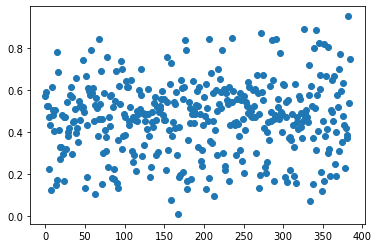

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,385)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

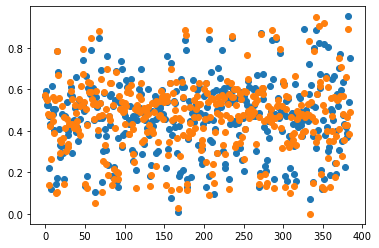

In [196]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)